# 손글씨 인식 (CNN)
**Convolutional Neural Network** <br/>
MNIST 데이터셋을 활용한 CNN 모델 실험 <br/>
TenserFlow의 표준 API인 tf.keras의 Sequential API를 이용하여, 숫자 손글씨 인식기 만들기

In [45]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## (1) MNIST Dataset 불러들이기

In [65]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

# Tensorflow의 버전 출력
print(tf.__version__)  

# MNIST 데이터 로드
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# x_train, x_test 배열의 크기를 출력
print(len(x_train)) 
print(len(x_test)) 

2.18.0
60000
10000


## (2) 데이터 시각화 - 손글씨 이미지 출력
### 특정 인덱스의 손글씨 이미지 출력
MNIST 데이터셋의 X항목(x_train, x_test)은 이미지 데이터를 담은 행렬(matrix)이다.

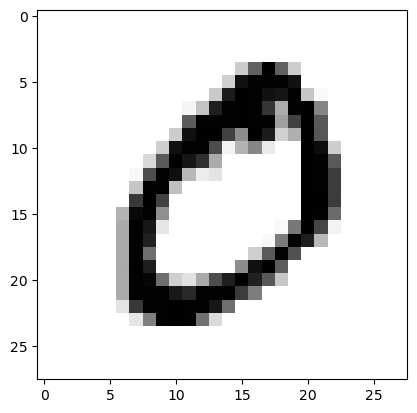

In [48]:
plt.imshow(x_train[1],cmap=plt.cm.binary) # x_train[1]:x_train행렬의 2번째 이미지
plt.show()

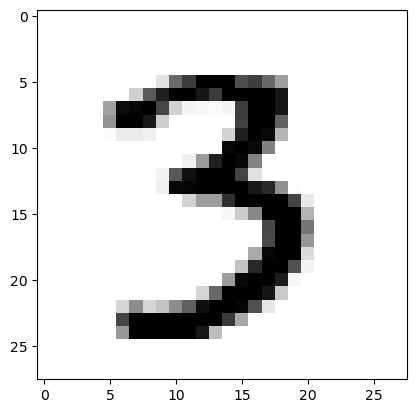

10001 번째 이미지의 숫자는 바로  3 입니다.


In [49]:
index=10000  # index 랜덤 숫자 입력  
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

## (3) 학습용 데이터와 시험용 데이터
#### (x_train, y_train), (x_test, y_test) = mnist.load_data()

mnist.load( ) 함수를 통해 학습용 데이터 (x_train, y_train)와 시험용 데이터 (x_test, y_test)를 나누어 받아들임 <br/>
숫자 손글씨 분류기는 학습용 데이터 (x_train, y_train)만을 가지고 학습시킴. 성능 테스트는 시험용 데이터(x_test,y_test)로

-**학습용데이터** : 입력(x_train), 정답(y_train) <br/>
-**시험용데이터** : 입력(x_test), 정답(y_test)

In [50]:
# 학습용 데이터 확인 코드
print(x_train.shape) 

(60000, 28, 28)


In [51]:
# 시험용 데이터 확인 코드
print(x_test.shape) 

(10000, 28, 28)


학습용 데이터 : 28x28크기의 숫자 이미지가 60,000장 있다. <br/>
시험용 데이터 : 28x28크기의 숫자 이미지가 10,000장 있다.

<br/>

-----
**학습용 데이터 (Train set)**<br/>
모델을 학습하기 위한 dataset.<br/>
모델을 학습하는데에는 오직 유일하게 Train dataset만 이용

**검증용 데이터 (Validation set)**<br/>
학습이 이미 완료된 모델을 검증하기위한 dataset<br/>
머신러닝 학습 과정이 정상적으로 진행되고 있는지, 오버피팅이 발생하고 있지 않은지, 학습을 중단해도 되는지 등을 확인 및 평가가 (학습X | 학습에 관여O)

**시험용 데이터 (Test set)**<br/>
학습과 검증이 완료된 모델의 성능을 평가하기위한 dataset
학습에 전혀 관여하지 않고 오직 '최종 성능'을 평가하기 위해 쓰임
<br/>

## (4) 데이터 전처리

In [52]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


숫자 손글씨 이미지의 실제 픽셀 값은 0~255사이의 값을 가진다는 것을 확인 <br/>
인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0~1 사이의 값으로 **정규화** 시켜주는 것이 좋음

In [53]:
#데이터 정규화 (0~255 > 0~1)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0 # 데이터들을 255.0으로 나눠주기
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## (5) 딥러닝 네트워크 설계
#### Sequential Model 사용

tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예

In [54]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1))) # 사용하는 이미지 특징의 수(얼마나 다양한 이미지의 특징을 살펴볼 것인지, 고려 할 것인지)=16 / # input_shape=입력 이미지의 형태
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu')) # 32개의 이미지 특징을 고려
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu')) # 분류기에 사용되는 뉴런의 값 32 (클수록 복잡잡)
model.add(keras.layers.Dense(10, activation='softmax')) # 결과적으로 분류해 내야 하는 class 수 10 (0~9까지 총 10개의 class 구분) 

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


C:\Users\류예나\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# 딥러닝 네트워크 모델 확인
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,762 (120.16 KB)

 Trainable params: 30,762 (120.16 KB)

 Non-trainable params: 0 (0.00 B)

## (6) 딥러닝 네트워크 학습

### 데이터 Reshape <br/>
이전 코드 첫 번째 레이어에 input_shape=(28,28,1) 지정 후,  <br/>
print(x_train.shape)를 하면 (60000,28,28) 채널수에 대한 정보가 없다. <br/>
**CNN 모델**을 위해, 데이터 모양을 (60000,28,28,1)로 변경 해야 한다.

In [56]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [57]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10) #epochs:전체 60,000개의 데이터를 10번 반복 사용해서 학습하라.


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8716 - loss: 0.4191
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9784 - loss: 0.0701
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0468
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9884 - loss: 0.0366
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9910 - loss: 0.0281
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9928 - loss: 0.0220
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9932 - loss: 0.0198
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9946 - loss: 0.0162
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9957 - loss: 0.0130
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9960 - loss: 0.0119


## (7) test data로 성능 확인

In [ ]:
#성능 평가
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


313/313 - 2s - 7ms/step - accuracy: 0.9911 - loss: 0.0306
test_loss: 0.030615948140621185 
test_accuracy: 0.991100013256073


학습용 데이터인 x_train에서는 99.60점이었는데, 시험용 데이터인 **x_test결과 99.11점으로 하락** <br/>
<br/>
이유? MNIST 데이터셋 참고문헌을 보면 학습용 데이터와 시험용 데이터의 손글씨 주인이 다른 것을 알 수 있다. <br/>
한 번도 본 적이 없는 필체의 손글씨가 섞여 있을 가능성이 높다. 인식률이 떨어지는 것은 어느 정도 예상 가능한 일<br/>
<br/>

### 추론 결과 확인 <br/>
model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 **실제로 추론한 확률분포**(model이 추론한 확률값)를 출력할 수 있다

In [ ]:
# 모델 예측
predicted_result = model.predict(x_test_reshaped) 
predicted_labels = np.argmax(predicted_result, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


model.predict() 결과 :  [3.02732145e-12 9.49457846e-10 4.62533592e-07 1.23374395e-08
 1.20035821e-08 7.80226717e-11 9.29987272e-19 9.99999285e-01
 2.74212625e-10 2.87669508e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


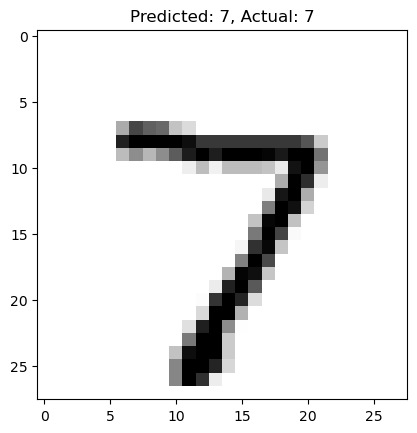

In [69]:
idx=0  # 1번째 x_test 데이터

print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

#숫자 7이 맞는지 이미지로 확인
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_labels[idx]}, Actual: {y_test[idx]}")
plt.show()

#### model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우

예측확률분포: [1.9732854e-06 5.9581731e-07 7.0371165e-08 1.7239337e-07 1.0651599e-02
 2.2128846e-05 3.2410881e-08 5.3310270e-08 2.0954227e-05 9.8930234e-01]
라벨: 4, 예측결과: 9


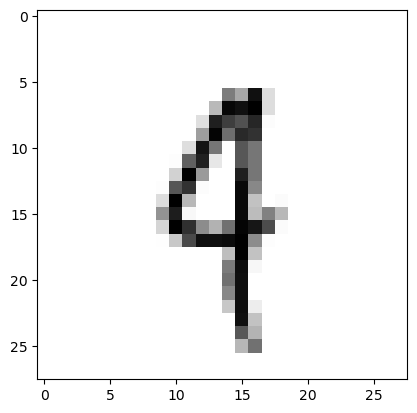

예측확률분포: [3.6655056e-05 4.2898517e-08 4.3955617e-09 4.7459405e-09 1.0114119e-01
 2.3252564e-06 2.4238554e-05 7.9759630e-08 3.4060500e-05 8.9876133e-01]
라벨: 4, 예측결과: 9


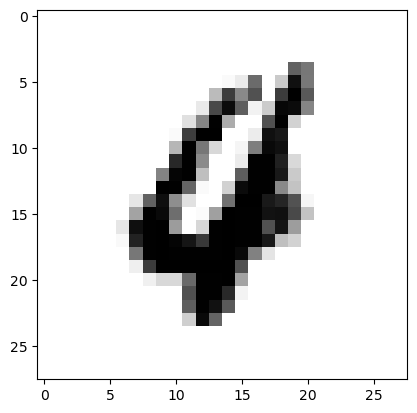

예측확률분포: [1.1812188e-04 1.5281996e-06 4.8133529e-08 5.4094062e-07 1.1071869e-07
 6.8710852e-01 2.8187072e-01 1.1056414e-08 2.8886501e-02 2.0139264e-03]
라벨: 6, 예측결과: 5


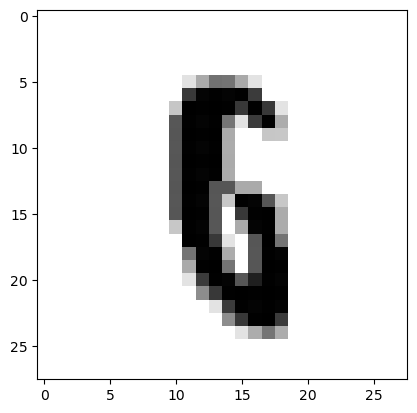

예측확률분포: [1.2801188e-08 5.1474922e-06 9.6376473e-01 3.8545385e-03 9.4076764e-09
 3.7430143e-09 4.7216181e-12 3.2373514e-02 2.0237730e-06 6.8274173e-09]
라벨: 7, 예측결과: 2


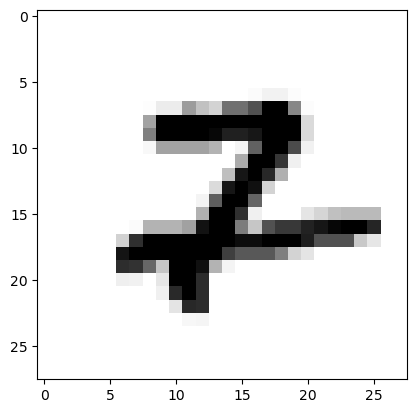

예측확률분포: [6.34314912e-09 2.23546017e-08 1.29182908e-07 4.12143320e-15
 1.03217214e-01 3.14270970e-10 8.96782577e-01 7.55204496e-15
 7.15242336e-08 3.24384453e-09]
라벨: 4, 예측결과: 6


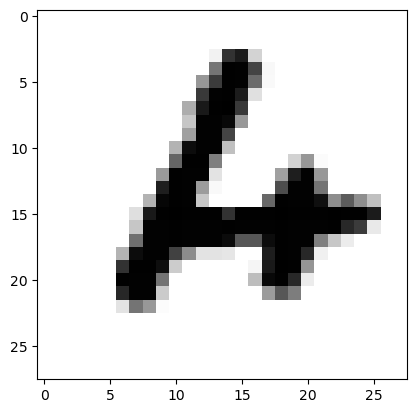

In [70]:
import random

#잘못된 예측 리스트
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 보기
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개 뽑기
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## (8) 인식률 높은 네트워크 만들기
#### 하이퍼파라미터 변경
- Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여 보기 
- Dense 레이어에서 뉴런수를 바꿔보기 
- 학습 반복 횟수인 epoch 값을 변경

등 .. 조합하여 가장 높은 정확도 얻는 모델 만들기

In [62]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

#모델 재설계
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,762 (120.16 KB)

 Trainable params: 30,762 (120.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8551 - loss: 0.4736
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9758 - loss: 0.0749
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9842 - loss: 0.0501
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9880 - loss: 0.0390
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9902 - loss: 0.0299
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9914 - loss: 0.0262
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9929 - loss: 0.0216
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9948 - loss: 0.0164
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9950 - loss: 0.0155
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9960 - loss: 0.0123
313/313 - 2s - 7ms/step - accuracy: 0.9906 - loss: 0.0302
test_loss: 0.03022395260632038 
test_accuracy: 0.99